In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('D:/amazon-fine-food-reviews/Reviews.csv')

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data['helpful percentage'] = np.where(data['HelpfulnessDenominator'] > 0,data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'],-1)

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpful percentage,upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80%-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80%-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80%-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


In [4]:
data['upvote'] = pd.cut(data['helpful percentage'],bins=[-1,0,0.2,0.4,0.6,0.8,1.0],labels=['Empty','0-20%','20%-40%','40%-60%','60%-80%','80%-100%'],include_lowest=True)

上面计算出了评论有用率，然后根据这个特征使用分位数的方式进行分箱，对数据进行了离散化的处理，下面进行可视化的时候会需要这个特征

In [10]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpful percentage,upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80%-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80%-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80%-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,Empty


In [8]:
data_1 = data.groupby(['Score','upvote']).agg({'Id':'count'})

In [9]:
data_1 = data_1.unstack()

In [11]:
data_1.columns = data_1.columns.get_level_values(1)

Text(0.5, 1.0, 'How helpful users find among user scores')

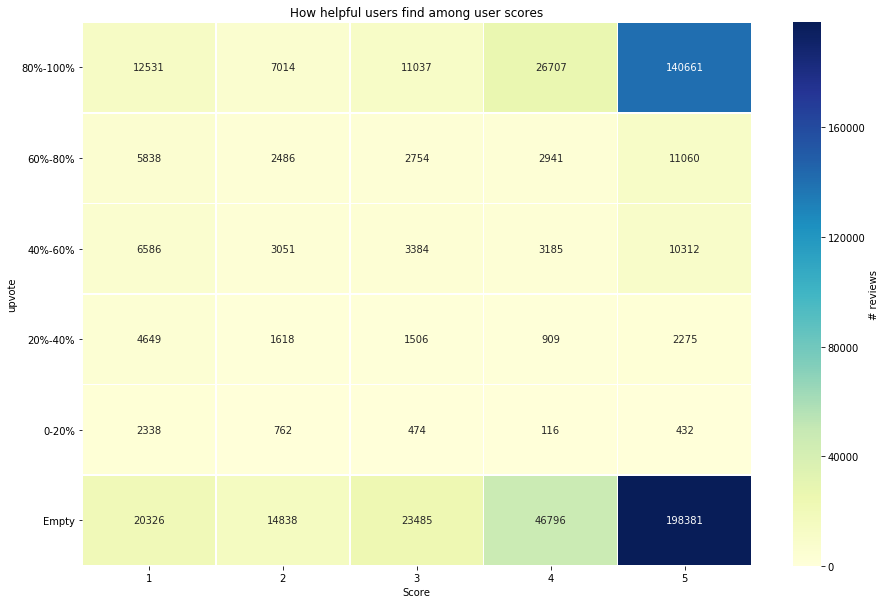

In [13]:
fig = plt.figure(figsize=(15,10))

sns.heatmap(data_1[data_1.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

这是一个热力图，从这个可视化的结果可以看出：
#评论偏向于正向
#有很多零票
#超过半数的人给了5分

下面先看一下数据中有没有缺失的情况

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = round(data.isnull().sum().sort_values(ascending=False)/len(data)*100,4)
pd.concat([total,percent],axis=1,keys=['total','percent'])

,total,percent
Summary,27,0.0047
ProfileName,16,0.0028
upvote,2,0.0004
helpful percentage,0,0.0000
Text,0,0.0000
Time,0,0.0000
Score,0,0.0000
HelpfulnessDenominator,0,0.0000
HelpfulnessNumerator,0,0.0000
UserId,0,0.0000


数据中的缺失数据很少，可以不做处理

下面对数据进行清洗，去除掉重复数据

In [6]:
data[data.duplicated(subset={'UserId','ProfileName','Time','Text'})].count()

Id                        174521
ProductId                 174521
UserId                    174521
ProfileName               174516
HelpfulnessNumerator      174521
HelpfulnessDenominator    174521
Score                     174521
Time                      174521
Summary                   174497
Text                      174521
helpful percentage        174521
upvote                    174521
dtype: int64

In [7]:
data = data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'})

下面处理目标变量

所有评论的得分在1-5之间，1、2为负面评论；3为中性评论；4、5为正面评论，所以，为了训练一个可以区分正面还是负面的评论模型，下面我打算将评分为3的中性评论剔除掉，将训练重点只关注到正面和负面的评论上

还有一点需要住，就是关于预测的目标变量的问题，正面评论的分数是4或5，而负面的评论是1或2，但是如果用这个分数进行预测的话，那么预测的结论是不准确的，因为，分数这个目标变量会受到很多因素的影响，会导致模型预测的复杂度很高，所以一般有两种方式处理这种问题：
#二值化的方式来处理，用1代表正面评论，用0代表负面评论
#分箱的方式处理，如果不能用二值来处理的话，那么可以使用这种形式

这里可以采用二值化的方式处理目标变量

In [8]:
data_score = data[data['Score'] != 3]
X = data_score['Text']
y_mapping = {1:0,2:0,4:1,5:1}
y = data_score['Score'].map(y_mapping)

目前所获取的数据都是非数值类型的数据，这种数据是不能直接应用到模型中去的，所以必须进行特征工程，将文本数据转化为数值的形式才可以，而比较常用的方式有：
#CountVectorizer:该方式是一种比较简单的方式，是只考虑每个单词的计数，可以将文本文档转化为文档向量的形式，是一种扁平向量。这种方式虽然简单，但是在处理分类任务和判断文档的相似性时这种方式已经可以有不错的表现了
#Tfidf：这种方式的特点是考虑了词频和逆文档频率，是CountVectorizer的一种简单的扩展。因为有时候，只用词汇的计数是很难凸显出数据的主要特点的，所以Tfidf可以更好的强调那些有意义的单词，这种方式会凸显出罕见词，并忽略常见词
#ngrams：这种方式加入了联想的功能，意思就是，每个词的出现都跟前一个或前若干个词有关，之前的技术都是不考虑语序的，但是这种技术考虑了词之间的顺序，在理解语义上要更加强大

下面先用CountVectorizer来处理文本数据

In [11]:
c = CountVectorizer(stop_words='english')
lr_c = LogisticRegression()

In [12]:
X_c = c.fit_transform(X)
print("feature:{}".format(X_c.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_c,y,random_state=0)
clf = lr_c.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

feature:114966
Model Accuracy:0.9252754253578058


D:\ana\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


通过逻辑回归这种简单的模型预测的结果还不错，有92.5%的准确率

下面打算展示一下前20的正向词汇和负向词汇，看看有什么特点

In [15]:
def show_p_n_top20(model,clf_model):
    words = model.get_feature_names()
    coef = clf_model.coef_.tolist()[0]
    coef_data = pd.DataFrame({'Word':words,'Coef':coef}).sort_values(['Coef','Word'],ascending=[0,1])
    print('Top 20 positive')
    print(coef_data.head(20).to_string(index=False))
    print("")
    print("Top 20 negative")
    print(coef_data.tail(20).to_string(index=False))

In [13]:
show_p_n_top20(c,clf)

Top 20 positive
       Word      Coef
 pleasantly  3.003869
  addicting  2.352231
  skeptical  2.269993
     hooked  2.130548
   downside  2.021214
   drawback  1.967960
    easiest  1.914714
  delicious  1.879232
  delighted  1.842513
  addictive  1.829914
 compromise  1.803180
     highly  1.791889
    awesome  1.764523
     divine  1.759387
      lends  1.718197
   terrific  1.710969
  excellant  1.706685
     delish  1.700890
  excellent  1.700619
        yum  1.696068

Top 20 negative
           Word      Coef
          awful -1.975263
         lacked -1.997284
     discolored -2.001277
         ripoff -2.087076
           yuck -2.099003
      cancelled -2.139168
       terrible -2.157024
            ick -2.269972
  dissapointing -2.270117
    embarrassed -2.308121
      deceptive -2.317174
 disappointment -2.320441
    unappealing -2.335581
    undrinkable -2.386631
      redeeming -2.420052
        weakest -2.432500
       mediocre -2.503004
   unacceptable -2.668407
  disappoin

从上面的结果可以看出，有一些词汇是没有意义的，并且词汇对应的系数太小，没有凸显出对结果的预测能力，需要换一种技术

下面用Tfidf来处理文本数据

In [9]:
tfidf = TfidfVectorizer(stop_words='english')
lr_tfidf = LogisticRegression()

In [15]:
X_tfidf = tfidf.fit_transform(X)
print("feature:{}".format(X_tfidf.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,random_state=0)
clf = lr_tfidf.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

feature:114966
Model Accuracy:0.9263628475082655


In [16]:
show_p_n_top20(tfidf,clf)

Top 20 positive
       Word       Coef
      great  13.731183
  delicious  12.123467
       best  11.506492
    perfect  10.020161
  excellent   9.189412
     highly   8.926628
      loves   8.596985
  wonderful   8.031703
       love   8.004626
    amazing   7.413560
       good   7.399389
    awesome   7.223602
   favorite   6.596850
    pleased   6.556776
     smooth   6.555129
       nice   6.503986
       glad   6.282333
     hooked   6.265523
 pleasantly   6.183926
      yummy   6.096321

Top 20 negative
           Word       Coef
          hopes  -5.383322
          gross  -5.501086
          worse  -5.834933
           yuck  -5.969105
           weak  -6.018109
     disgusting  -6.060977
          waste  -6.161131
          bland  -6.194964
      tasteless  -6.201613
          stale  -6.460918
         return  -6.747469
          threw  -6.752924
  unfortunately  -6.775694
       horrible  -7.411497
   disappointed  -8.165174
          awful  -8.279645
 disappointment  -8.41424

从上面的结果可以看出来，准确率是没有什么变化的，但是筛选出来的词汇变得更有意义了，而且每个词汇对应的系数都提高了，说明Tfidf模型的效果要更好一些

下面使用带有n-grams的技术尝试效果

In [22]:
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
lr_tfidf_ngram = LogisticRegression()

In [23]:
X_tfidf_ngram = tfidf_ngram.fit_transform(X)
print("feature:{}".format(X_tfidf_ngram.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_tfidf_ngram,y,random_state=0)
clf = lr_tfidf_ngram.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

feature:3933091
Model Accuracy:0.9247481903757647


In [19]:
show_p_n_top20(tfidf_ngram,clf)

Top 20 positive
             Word       Coef
            great  20.331988
             best  16.629805
        delicious  16.415810
          perfect  13.323358
             love  12.489201
        excellent  12.102324
            loves  11.721839
             good  11.043472
        wonderful  10.830321
         favorite   9.619220
             nice   9.575506
          amazing   9.093219
             easy   8.716374
          awesome   8.524229
            tasty   8.388315
            happy   8.367787
          pleased   8.234473
           highly   8.231344
           smooth   7.923612
 highly recommend   7.725262

Top 20 negative
           Word       Coef
          waste  -7.384519
            bad  -7.454619
        thought  -7.491295
      tasteless  -7.513624
          worse  -7.525152
     disgusting  -7.711821
          money  -7.818462
           weak  -8.665557
          bland  -8.711721
          threw  -8.816860
          stale  -9.578499
         return  -9.684988
  unfor

从上面的结果可以看出来，在使用了n-grams之后，模型预测的准确率没有什么变化，但是每个词汇对应的系数都提升了，证明这个模型会更好一点

下面更改了n-grams中N的值来看看有什么效果

之前n-grams使用的是（1，2），模型的准确率没有什么变化，但是词汇对应的系数都提高了，证明选择出来的词汇更有意义，对结果的影响力更大。现在尝试使用其他的参数值来看看有什么效果

尝试一下n-grams=(1,3)的情况

In [17]:
tfidf_ngram_1_3 = TfidfVectorizer(ngram_range=(1,3),stop_words='english')
lr_tfidf_1_3 = LogisticRegression()

In [18]:
X_tfidf_ngram_1_3 = tfidf_ngram_1_3.fit_transform(X)
print("feature:{}".format(X_tfidf_ngram_1_3.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_tfidf_ngram_1_3,y,random_state=0)
clf = lr_tfidf_1_3.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

feature:13766793


D:\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy:0.9159719247372063


In [14]:
show_p_n_top20(tfidf_ngram_1_3,clf)

Top 20 positive
      Word       Coef
     great  24.969415
      best  19.542463
 delicious  18.318912
      love  15.607212
   perfect  14.824345
      good  13.514419
 excellent  13.377788
     loves  13.321796
 wonderful  12.072559
  favorite  11.288808
      nice  11.257812
      easy  10.225125
     happy   9.603495
   amazing   9.602861
     tasty   9.592045
    highly   9.288934
   pleased   8.811716
   awesome   8.794841
    smooth   8.540949
      glad   8.148271

Top 20 negative
           Word       Coef
          worse  -8.021963
     disgusting  -8.426136
          maybe  -8.623589
          waste  -9.127250
        thought  -9.671207
          bland  -9.724307
           weak  -9.811609
          threw  -9.907869
            bad -10.206661
          money -10.260387
 disappointment -10.505697
          stale -11.177395
         return -11.225381
  unfortunately -11.227244
       horrible -12.134441
          awful -12.942507
  disappointing -13.083300
       terrible -13

模型的预测准确率没有明显的变化，就是词汇对应的系数有了进一步的提升，但是提升效果已经不明显了

In [16]:
tfidf_ngram_1_4 = TfidfVectorizer(ngram_range=(1,4),stop_words='english')
lr_tfidf_ngram_1_4 = LogisticRegression()

In [17]:
X_tfidf_ngram_1_4 = tfidf_ngram_1_4.fit_transform(X)
print("feature:{}".format(X_tfidf_ngram_1_4.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_tfidf_ngram_1_4,y,random_state=0)
clf = lr_tfidf_ngram_1_4.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracty:{}".format(acc))

feature:25244472


D:\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracty:0.9083489856218627


In [18]:
show_p_n_top20(tfidf_ngram_1_4,clf)

Top 20 positive
      Word       Coef
     great  27.597481
      best  20.993764
 delicious  19.096854
      love  17.388481
   perfect  15.454223
      good  14.887983
     loves  14.037396
 excellent  13.845947
 wonderful  12.541767
  favorite  12.079352
      nice  12.029410
      easy  10.978152
     happy  10.086977
     tasty  10.076320
    highly   9.838453
   amazing   9.665637
   pleased   8.916508
   awesome   8.754552
    stores   8.732621
    smooth   8.721931

Top 20 negative
           Word       Coef
     disgusting  -8.676041
            did  -8.774099
          maybe  -9.489500
          bland -10.017710
          waste -10.187399
           weak -10.209625
          threw -10.434257
 disappointment -10.533769
        thought -10.941092
  unfortunately -11.697725
          money -11.815770
          stale -11.894359
            bad -11.983506
         return -12.000765
       horrible -12.949886
  disappointing -13.229806
          awful -13.654360
       terrible -14

可以看出来，对于n-grams模型中的N来说，当N越大时，可以提取出来的信息量就越多，但是随着N的增加，数据的信息量增长的速度放缓，所以从这个实验可以看出一味的提升N并不一定可以提升模型的性能。最常用的N一般是2或3，从实际来看当N等于2时，预测的准确率也是最高的

之前对文本数据的预处理阶段只是做了去重的操作，下面想对文本做一些其他的处理，比如去掉一些额外的符号、转化小写、去除停用词等等操作，然后再看看这个文本数据的表现

In [8]:
'''
data_3 = data[data['Score'] != 3]
y_mapping = {'0-20%':0,'20%-40%':0,'60%-80%':1,'80%-100%':1}
data_3['upvote'] = data_3['upvote'].map(y_mapping)
downvote_word2vec_data = len(data_3[data_3['upvote'] == 0])
downvote_word2vec_indices = np.array(data_3[data_3['upvote'] == 0].index)
upvote_word2vec_indices = data_3[data_3['upvote'] == 1].index
random_upvote_indices = np.random.choice(upvote_word2vec_indices,downvote_word2vec_data,replace=False)
random_upvote_indices = np.array(random_upvote_indices)

#combine
sample_word2vec_data = np.concatenate([downvote_word2vec_indices,random_upvote_indices])
sample_word2vec_data = data_3.ix[sample_word2vec_data,:]
X_sample_word2vec_data = sample_word2vec_data['Text']
sample_word2vec_data['upvote'] = sample_word2vec_data['upvote'].astype(int)
y_sample_word2vec_data = sample_word2vec_data['upvote']

#Display data status
print("upvote percentage:",len(sample_word2vec_data[sample_word2vec_data['upvote'] == 1])/len(sample_word2vec_data))
print("downvote pencentage:",len(sample_word2vec_data[sample_word2vec_data['upvote'] == 0])/len(sample_word2vec_data))
print("record:",len(sample_word2vec_data))
'''

upvote percentage: 0.5
downvote pencentage: 0.5
record: 17154


D:\ana\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ana\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
import re
words = []
snow = nltk.stem.SnowballStemmer('english')
for sentence in X:
    #转换为小写
    sentence = sentence.lower()
    r = re.compile('<.*?>')
    sentence = re.sub(r,' ',sentence)
    sentence = re.sub(r'[?|!|\|"|#]',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)
    temp = [snow.stem(word) for word in sentence.split() if word not in stop_words]
    words.append(temp)
modify_data = words  

In [13]:
sentence = []
for row in modify_data:
    seq = ''
    for word in row:
        seq  = seq + ' ' + word
    sentence.append(seq)
modify_data = sentence

In [18]:
modify_data_ngram_2 = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
modify_lr = LogisticRegression()

In [19]:
modify_data_ngram_2 = modify_data_ngram_2.fit_transform(modify_data)
print("feature:{}".format(modify_data_ngram_2.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(modify_data_ngram_2,y,random_state=0)
clf = modify_lr.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracty:{}".format(acc))

feature:3011523


D:\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracty:0.9231005810568864


In [ ]:
'''w2v_data = modify_data

split = []
for row in w2v_data:
    split.append([word for word in row.split()])
    
w2v_data = Word2Vec(split,min_count=5,workers=2)
'''

D:\ana\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


下面我打算找出成绩为5的数据，并基于此数据找出不满意的评论，并根据这个促进销售

In [9]:
data_score_5 = data[data['Score'] == 5]
data_score_5 = data_score_5[data_score_5['upvote'].isin(['0-20%','20%-40%','60%-80%','80%-100%'])]

X = data_score_5['Text']
y_dict = {'0-20%':0,'20%-40%':0,'60%-80%':1,'80%-100%':1}
y = data_score_5['upvote'].map(y_dict)

print("Classs:")
print(y.value_counts())

Classs:
1    108242
0      1781
Name: upvote, dtype: int64


从上面的结果可以很明显的看出，正面和负面的评论数量有着严重的不平衡问题，需要先解决这个问题，需要对样本进行重新采样，以获得平衡数据

对于不平衡数据来说，比较常用的处理方式可以分为：
#欠采样：通过减少多数类别的样本数量，随机的从多数类样本中挑选与少数类数目一样的样本，然后与少数类组合起来构成平衡样本
#过采样：使用随机的方式来增加稀疏样本的数量，随机的从少数类的样本中抽取样本，产生的样本数量要与多数类的样本数量保持一致，然后在组合起来

下面我打算两种方式都尝试一下

欠采样

In [10]:
data_5 = pd.DataFrame([X,y]).T

In [27]:
downvote = len(data_5[data_5['upvote'] == 0])
downvote_indices = np.array(data_5[data_5['upvote'] == 0].index)
upvote_indices = data_5[data_5['upvote'] == 1].index
random_upvote_indices = np.random.choice(upvote_indices,downvote,replace=False)
random_upvote_indices = np.array(random_upvote_indices)

#combine
undersampling_sample_data = np.concatenate([downvote_indices,random_upvote_indices])
undersampling_sample_data = data_5.ix[undersampling_sample_data,:]
X_sample_data = undersampling_sample_data['Text']
undersampling_sample_data['upvote'] = undersampling_sample_data['upvote'].astype(int)
y_sample_data = undersampling_sample_data['upvote']

#Display data status
print("upvote percentage:",len(undersampling_sample_data[undersampling_sample_data['upvote'] == 1])/len(undersampling_sample_data))
print("downvote pencentage:",len(undersampling_sample_data[undersampling_sample_data['upvote'] == 0])/len(undersampling_sample_data))
print("record:",len(undersampling_sample_data))

upvote percentage: 0.5
downvote pencentage: 0.5
record: 3562


D:\ana\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [12]:
c = CountVectorizer(stop_words='english')
lr_c = LogisticRegression()

In [13]:
X_c = c.fit_transform(X_sample_data)
print("feature:{}".format(X_c.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_c,y_sample_data,random_state=0)
clf = lr_c.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

feature:14293


D:\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy:0.6083052749719416


In [16]:
show_p_n_top20(c,clf)

Top 20 positive
         Word      Coef
   satisfying  1.385830
        soups  1.272362
         aren  1.207330
      locally  1.205441
         chip  1.140293
       plenty  1.129282
         rice  1.076600
 discontinued  1.034186
        ready  1.028646
          lot  1.009308
        fresh  1.002810
      wrapped  0.972904
      polenta  0.962462
        lower  0.940325
       issues  0.930297
       bodied  0.896076
     dressing  0.891062
     hazelnut  0.884620
  alternative  0.883908
    packaging  0.882446

Top 20 negative
        Word      Coef
       ounce -0.790713
         man -0.797334
        dick -0.798905
      prompt -0.807774
      caviar -0.835183
       shake -0.858117
    packages -0.895400
        face -0.910357
       count -0.911644
       gonna -0.942460
      course -0.946968
      packed -0.949852
 traditional -0.966823
        zico -0.968097
     dollars -1.012717
      vacuum -1.017197
     gourmet -1.065076
      lipton -1.164669
       kashi -1.267402
   

模型准确率为60.8%，模型预测的结果很差，而且top20的词汇都是一些没有意义的，且系数很小，说明这个模型并不好，下面换一个tfidf+ngram的模型

In [17]:
tfidf_ngram = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
lr_tfidf_ngram = LogisticRegression()

In [18]:
X_tfidf_ngram = tfidf_ngram.fit_transform(X_sample_data)
print("feature:{}".format(X_tfidf_ngram.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_tfidf_ngram,y_sample_data,random_state=0)
clf = lr_tfidf_ngram.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

feature:115443
Model Accuracy:0.6139169472502806


In [19]:
show_p_n_top20(tfidf_ngram,clf)

Top 20 positive
   Word      Coef
   food  1.794306
 flavor  1.514388
    mix  1.452837
   rice  1.372825
  fresh  1.294679
     ve  1.278080
  bread  1.238636
    lot  1.094500
    bag  1.078709
    oil  1.051109
    tea  0.956732
 family  0.941041
    cup  0.932672
 little  0.875884
  local  0.872869
  using  0.870888
  sugar  0.870824
  tried  0.831165
 gluten  0.809098
   year  0.802689

Top 20 negative
         Word      Coef
         said -0.589332
         zico -0.610203
         item -0.612801
       newman -0.617785
       lipton -0.622774
       caviar -0.622780
      bottles -0.633088
        ounce -0.669767
     brooklyn -0.670501
     delivery -0.697399
       people -0.727941
       treats -0.728432
       bottle -0.728589
      service -0.763723
 great coffee -0.766848
      product -0.966277
        order -1.012791
       coffee -1.105332
           br -1.365488
        water -1.691325


结果的预测准确率为61.4%，虽然有所提高，但是依然很差，并且词汇仍然都是一些没有意义的

下面尝试用过采样的方式

In [26]:
downvote = len(data_5[data_5['upvote'] == 0])
downvote_indices = np.array(data_5[data_5['upvote'] == 0].index)
upvote_indices = data_5[data_5['upvote'] == 1].index
upvote = len(data_5[data_5['upvote'] == 1])
random_downvote_indices = np.random.choice(downvote_indices,upvote,replace=True)
random_downvote_indices = np.array(random_downvote_indices)

#combine
oversampling_sample_data = np.concatenate([random_downvote_indices,upvote_indices])
oversampling_sample_data = data_5.ix[oversampling_sample_data,:]
X_sample_data = oversampling_sample_data['Text']
oversampling_sample_data['upvote'] = oversampling_sample_data['upvote'].astype(int)
y_sample_data = oversampling_sample_data['upvote']

#Display data status
print("upvote percentage:",len(oversampling_sample_data[oversampling_sample_data['upvote'] == 1])/len(oversampling_sample_data))
print("downvote pencentage:",len(oversampling_sample_data[oversampling_sample_data['upvote'] == 0])/len(oversampling_sample_data))
print("record:",len(oversampling_sample_data))

upvote percentage: 0.5
downvote pencentage: 0.5
record: 216484


D:\ana\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


下面使用tfidf+ngram的模式来看看效果

In [21]:
tfidf_ngram_2 = TfidfVectorizer(ngram_range=(1,2),stop_words='english')
lr_tfidf_ngram_2 = LogisticRegression()

In [22]:
X_tfidf_ngram_2 = tfidf_ngram_2.fit_transform(X_sample_data)
print("feature:{}".format(X_tfidf_ngram_2.shape[1]))
X_train,X_test,y_train,y_test = train_test_split(X_tfidf_ngram_2,y_sample_data,random_state=0)
clf = lr_tfidf_ngram_2.fit(X_train,y_train)
acc = clf.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

feature:1792465
Model Accuracy:0.9971914783540585


In [23]:
show_p_n_top20(tfidf_ngram_2,clf)

Top 20 positive
        Word      Coef
         lot  3.871871
       fresh  3.850448
      ginger  3.496564
       boxes  3.379511
     mustard  3.333140
        chai  3.273890
          ve  3.152628
   allergies  3.111978
 great value  3.084394
     dessert  3.061939
      bitter  3.045501
      stevia  3.024921
         mix  2.967992
         bag  2.959032
   container  2.958419
       light  2.833507
        true  2.822663
        heat  2.792446
        food  2.782800
        kick  2.761385

Top 20 negative
         Word      Coef
         lard -4.197187
   think best -4.200949
       people -4.240418
        ramen -4.255085
       marley -4.326909
        kashi -4.333575
        wrong -4.379519
        gonna -4.412374
       review -4.554280
       caviar -4.556564
 great coffee -4.561297
       lipton -4.584414
     kombucha -4.736113
      product -4.835458
         item -4.902981
       seller -4.914690
       newman -5.215016
          man -5.531846
        water -6.212046
    

从结果可以看出，这种过采样的方式可以带来99.7%的预测准确率，乍一看这个模型是很好的，但是之所以有这样的准确率我觉得主要还是因为随机样本的选择方式上，因为我使用了有放回的方式，那么很有可能会随机到很多重复的样本，那么这时候训练数据和测试数据中就一定会有重复的情况，所以预测的结果自然就很高，另外这种差异也与过采样可以带来比欠采样要多的多的数据有一定关系，因为数据量的增加是可以提升模型的性能的。所以，这个模型的准确率其实并没有什么可参考性，对于未知数据的泛化能力不会很高

再来看词汇对应的系数，也不是很大，所以词汇的意义还是比较小，预测的能力并不强

鉴于上面的模型表现不佳，没有找出什么有意义的词汇，也就是基于现有的特征是无法有更好的表现了，所以下面我打算尝试构造一些新的特征，看看能不能带来更好的表现

下面使用欠采样的数据

In [28]:
#每条评论的单词数量
undersampling_sample_data['words_count'] = undersampling_sample_data['Text'].apply(lambda x:len(x.split()))
#带有问好的评论
undersampling_sample_data['question'] = undersampling_sample_data['Text'].apply(lambda x:sum(1 for c in x if c == '?'))
#带有感叹号的评论
undersampling_sample_data['exclamation'] = undersampling_sample_data['Text'].apply(lambda x:sum(1 for c in x if c == '!'))
#带有大写字母的评论
undersampling_sample_data['capitial_count'] =undersampling_sample_data['Text'].apply(lambda x:sum(1 for c in x if c.isupper()))

In [29]:
print(undersampling_sample_data.groupby('upvote').agg({'words_count':'mean','capitial_count':'mean','question':'mean','exclamation':'mean'}).T)

upvote                  0          1
words_count     77.537900  87.734980
capitial_count  17.555306  14.834363
question         0.175182   0.086468
exclamation      0.874789   0.965188


从结果可以看出，反对评论的词汇数量有77，而点赞评论的词汇数量有87；还有不管是什么评论，带有疑问的评论是很少的，但是带有感叹号的评论却很多

In [30]:
#筛选出需要的数据
X_counts = undersampling_sample_data[undersampling_sample_data.columns.difference(['upvote','Text'])]
y_counts = undersampling_sample_data['upvote']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_counts,y_counts,random_state=0)
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)
acc = clf_lr.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

Model Accuracy:0.5993265993265994


下面使用过采样的数据

In [32]:
#每条评论的单词数量
oversampling_sample_data['words_count'] = oversampling_sample_data['Text'].apply(lambda x:len(x.split()))
#带有问好的评论
oversampling_sample_data['question'] = oversampling_sample_data['Text'].apply(lambda x:sum(1 for c in x if c == '?'))
#带有感叹号的评论
oversampling_sample_data['exclamation'] = oversampling_sample_data['Text'].apply(lambda x:sum(1 for c in x if c == '!'))
#带有大写字母的评论
oversampling_sample_data['capitial_count'] =oversampling_sample_data['Text'].apply(lambda x:sum(1 for c in x if c.isupper()))

In [33]:
print(oversampling_sample_data.groupby('upvote').agg({'words_count':'mean','capitial_count':'mean','question':'mean','exclamation':'mean'}).T)

upvote                  0          1
words_count     77.293740  85.721688
capitial_count  17.517405  13.812762
question         0.169934   0.078925
exclamation      0.876222   0.948384


从结果可以看出，反对评论的词汇数量有77，而点赞评论的词汇数量有85；还有不管是什么评论，带有疑问的评论是很少的，但是带有感叹号的评论却很多

In [34]:
#筛选出需要的数据
X_counts = oversampling_sample_data[oversampling_sample_data.columns.difference(['upvote','Text'])]
y_counts = oversampling_sample_data['upvote']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_counts,y_counts,random_state=0)
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)
acc = clf_lr.score(X_test,y_test)
print("Model Accuracy:{}".format(acc))

D:\ana\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy:0.5958869939579831


但是说实话，这种构造出来的特征有点随便，是不会给预测带来什么好的提升的，这两种方式的预测准确率只有60%而已

需要思考更多，找出更有意义的特征

In [36]:
data_user = data.groupby(['UserId','ProfileName']).agg({'Score':['count','mean']})
data_user.columns = data_user.columns.get_level_values(1)
data_user.columns = ['score count','score mean']

In [37]:
data_user = data_user.sort_values(by = 'score count',ascending=False)

In [38]:
print(data_user.head())

                                                       score count  score mean
UserId         ProfileName                                                    
AY12DBB0U420B  Gary Peterson                                   329    4.659574
A3OXHLG6DIBRW8 C. F. Hill "CFH"                                278    4.546763
A281NPSIMI1C2R Rebecca of Amazon "The Rebecca Review"          259    4.787645
A1YUL9PCJR3JTY O. Brown "Ms. O. Khannah-Brown"                 214    4.621495
A1Z54EM24Y40LL c2                                              211    4.383886


从结果可以看出，评论最多的用户是一个叫Gary Peterson的人，一共有329条，其平均评分为4.66

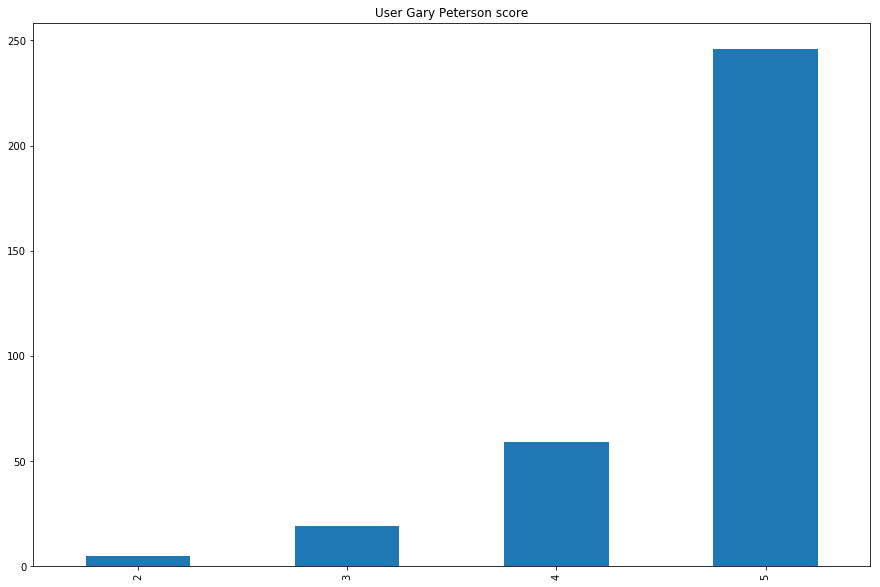

In [40]:
def plot_score(UserId):
    data_user = data[data['UserId'] == UserId]['Score']
    data_user_plot = data_user.value_counts(sort=False)
    ax = data_user_plot.plot(kind='bar',figsize=(15,10),title="User {} score".format(data[data['UserId'] == UserId]['ProfileName'].iloc[0]))

plot_score('AY12DBB0U420B')

从上面的直方图中可以看出，该用户给了很多高分，1分的一个都没有，2分的只有几个，中立分3也很少，4和5的高分却给了很多，所以该用户非常容易给高分，那么这种用户不具备一般性，参考价值不大

下面我要筛选一下平均分在2.5到3.5之间的用户，这种用户分析起来会更方便

In [51]:
print(data_user[(data_user['score mean'] < 3.5) & (data_user['score mean'] > 2.5)].head())

                                                        score count  \
UserId         ProfileName                                            
A2M9D9BDHONV3Y A. Bennett                                        92   
A2XNJJ9TF70P4J Angie                                             69   
A2TN9C5E4A0I3F Jimmy                                             61   
AJB5P7GVR0MT8  Harry the Horse                                   60   
AQ6AGWKWMTY8H  Pam Tee "mom,wife,fur-mom,book-blogger"           50   

                                                        score mean  
UserId         ProfileName                                          
A2M9D9BDHONV3Y A. Bennett                                 3.413043  
A2XNJJ9TF70P4J Angie                                      3.188406  
A2TN9C5E4A0I3F Jimmy                                      2.868852  
AJB5P7GVR0MT8  Harry the Horse                            3.333333  
AQ6AGWKWMTY8H  Pam Tee "mom,wife,fur-mom,book-blogger"    3.440000  


根据结果，我选择了出现次数最多，且在2.5到3.5之间的用户A. Bennett

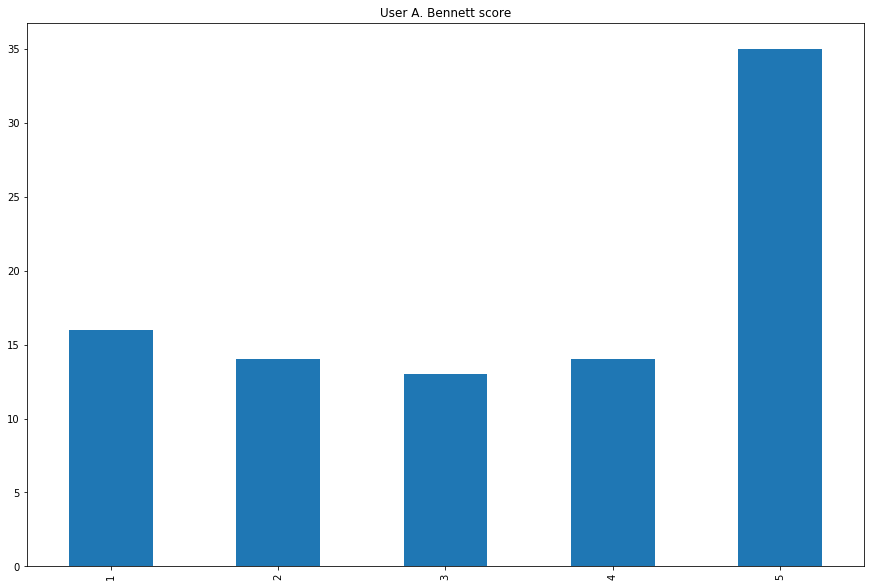

In [52]:
plot_score('A2M9D9BDHONV3Y')

从可视化的结果可以看出，这个用户更值得分析，下面进行一些具体的分析工作

In [53]:
def get_token_words(score,mark,userid='all'):
    #判断是某个用户还是全部用户
    if userid != 'all':
        data_u_s = data[(data['UserId'] == userid) & (data['Score'] == score)]['Text']
    else:
        data_u_s = data[data['Score'] == score]['Text']
        
    count = len(data_u_s)
    text = ' '.join(data_u_s)
    #将文本转化为小写形式
    text = text.lower()
    #生成停用词列表
    stop_words = set(stopwords.words('english'))
    #建立分词
    words_list = nltk.word_tokenize(text)
    #筛选出长度大于3且不在停用词列表中的词汇
    words_list = [word for word in words_list if word not in stop_words and len(word) >= 3]
    #词性还原
    lemmatizer = WordNetLemmatizer()
    #动词
    words_list = [lemmatizer.lemmatize(w,'v') for w in words_list]
    #ngrams模型
    bigrams = ngrams(words_list,2)
    trigrams = ngrams(words_list,3)
    
    combine = chain(bigrams,trigrams)
    texts = nltk.Text(combine)
    #统计combine中相同元素的个数
    fdist = nltk.FreqDist(texts)
    
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(texts) if fdist[w] >= count * mark],key=lambda x: -x[1])

该函数用于找出最常出现的词汇，可以用于分析数据

下面找出A. Bennett用户最常使用的词汇

In [54]:
indexs = ['Phrase','Count','Occur']

#1-5的所有成绩
for i in range(1,6):
    test = pd.DataFrame()
    messages = get_token_words(i,0.25,'A2M9D9BDHONV3Y')
    print("Score {} most popular 2grams and 3grams:".format(i))
    for j in messages:
        test = test.append(pd.Series(j,index=indexs),ignore_index=True)
        test = test.sort_values('Count',ascending=False)
    print(test)

Score 1 most popular 2grams and 3grams:
   Count   Occur           Phrase
0   13.0  81.25%       (..., ...)
1    6.0   37.5%     (never, buy)
2    6.0   37.5%  (..., ..., ...)
3    4.0   25.0%   (buy, product)
Score 2 most popular 2grams and 3grams:
   Count   Occur         Phrase
0    5.0  35.71%  (taste, like)
1    4.0  28.57%   (can, fruit)
Score 3 most popular 2grams and 3grams:
   Count   Occur         Phrase
0    5.0  38.46%     (..., ...)
1    4.0  30.77%  (taste, like)
Score 4 most popular 2grams and 3grams:
   Count   Occur               Phrase
0    5.0  35.71%         (side, dish)
1    5.0  35.71%  (highly, recommend)
Score 5 most popular 2grams and 3grams:
   Count   Occur               Phrase
0   17.0  48.57%  (highly, recommend)


这个用户在低平分中总是喜欢用省略号这样的标记，而在高评分基本就只使用了“强烈推荐”这个词

下面找出所有评论的最常用词汇

In [55]:
index = ['Phrase','Count','Occur']

for i in range(1,6):
    test = pd.DataFrame()
    messages = get_token_words(i,0.02)
    print("Score {} most popular 2grams and 3grams:".format(i))
    for j in messages:
        test = test.append(pd.Series(j,index=indexs),ignore_index=True)
        test = test.sort_values("Count",ascending=False)
    print(test)

Score 1 most popular 2grams and 3grams:
     Count   Occur            Phrase
0   3916.0  10.79%     (taste, like)
1   1711.0   4.71%    (waste, money)
2   1439.0   3.96%       (n't, even)
3   1404.0   3.87%      (could, n't)
4   1251.0   3.45%       (n't, know)
5   1134.0   3.12%        (n't, buy)
6   1123.0   3.09%      (would, n't)
7    942.0   2.59%      (look, like)
8    912.0   2.51%    (think, would)
9    900.0   2.48%  (grocery, store)
10   877.0   2.42%    (buy, product)
11   830.0   2.29%        (..., ...)
12   794.0   2.19%     (throw, away)
13   791.0   2.18%       (n't, like)
14   780.0   2.15%      (n't, taste)
15   750.0   2.07%     (taste, good)
Score 2 most popular 2grams and 3grams:
     Count   Occur            Phrase
0   2220.0  10.67%     (taste, like)
1    919.0   4.42%       (n't, like)
2    882.0   4.24%      (would, n't)
3    754.0   3.62%        (n't, buy)
4    745.0   3.58%      (n't, taste)
5    744.0   3.58%    (think, would)
6    700.0   3.37%      (could, 

与之前结果最明显的差异就是在3、4、5的评论中页面链接出现的频繁了，但是还是没有什么其他的特别有意义的词汇出现

后来发现了一点，就是应该将重点放在形容词上，这样的结果应该会好

In [56]:
def get_token_adj(score,mark,userid='all'):
    #判断是单个用户还是全部用户
    if userid != 'all':
        data_u_s = data[(data['UserId'] == userid) & (data['Score'] == score)]['Text']
    else:
        data_u_s = data[data['Score'] == score]['Text']
        
    count = len(data_u_s)
    text = ' '.join(data_u_s)
    #将文件转化为小写形式
    text = text.lower()
    #提炼出停用词列表
    stop_words = set(stopwords.words('english'))
    #分词
    words_list = nltk.word_tokenize(text)
    #筛选出长度大于3且不在停用词列表中的词汇
    words_list = [word for word in words_list if word not in stop_words and len(word) >= 3]
    #词性还原
    lemmatizer = WordNetLemmatizer()
    #形容词
    words_list = [lemmatizer.lemmatize(w,'a') for w in words_list]
    words_list = [word for word,form in nltk.pos_tag(words_list) if form == 'JJ']
    
    texts = nltk.Text(words_list)
    #统计combine中相同元素的个数
    fdist = nltk.FreqDist(texts)
    
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(texts) if fdist[w] >= count * mark],key=lambda x: -x[1])


In [64]:
indexs = ['Phrase','Count','Occur']

for i in range(1,6):
    test = pd.DataFrame()
    messages = get_token_adj(i,0.2,'A2M9D9BDHONV3Y')
    print("Score {} most popular adj words:".format(i))
    for j in messages:
        test = test.append(pd.Series(j,index=indexs),ignore_index=True)
        test = test.sort_values('Count',ascending=False)
    print(test)

Score 1 most popular adj words:
   Count   Occur     Phrase
0    8.0   50.0%        bad
1    6.0   37.5%      awful
2    6.0   37.5%  delicious
3    5.0  31.25%     little
4    4.0   25.0%        fat
Score 2 most popular adj words:
    Count   Occur      Phrase
0     5.0  35.71%        good
1     4.0  28.57%       whole
2     4.0  28.57%        rich
3     4.0  28.57%       small
4     4.0  28.57%      little
5     3.0  21.43%        high
6     3.0  21.43%  artificial
7     3.0  21.43%       wrong
8     3.0  21.43%       awful
9     3.0  21.43%        soup
10    3.0  21.43%   delicious
11    3.0  21.43%        hard
Score 3 most popular adj words:
    Count   Occur        Phrase
0     7.0  53.85%         whole
1     5.0  38.46%          high
2     4.0  30.77%          good
3     4.0  30.77%  disappointed
4     4.0  30.77%         first
5     3.0  23.08%         black
6     3.0  23.08%         great
7     3.0  23.08%         tasty
8     3.0  23.08%     different
9     3.0  23.08%         

那么最终的结论就是：用户在吐槽的点是，食物量比较少、脂肪大、价格昂贵、食物口感偏硬等问题，那么找到问题后，就可以根据这些出现的问题来改善食物，进而促进销量

第二种尝试

In [ ]:
data_score_1_2 = data[(data['Score'] == 1) & (data['Score'] == 2)]
data_score_1_2 = data_score_1_2[data_score_1_2['upvote'].isin(['0-20%','20%-40%','60%-80%','80%-100%'])]

X = data_score_1_2['Text']
y_dict = {'0-20%':0,'20%-40%':0,'60%-80%':1,'80%-100%':1}
y = data_score_1_2['upvote'].map(y_dict)

print("Classs:")
print(y.value_counts())